In [1]:
import pandas as pd
from pymystem3 import Mystem
import matplotlib.pyplot as plt
import seaborn as sns
rest = pd.read_csv('/datasets/rest_data.csv')

### Шаг №1. Загрузите данные и подготовьте их к анализу

In [2]:
rest['object_name'] = rest['object_name'].str.lower()
rest['Lem_object_name'] = rest['object_name'].apply(Mystem().lemmatize)
rest['Lem_object_name'] = rest['Lem_object_name'].apply(' '.join)
rest['Lem_object_name'] = rest['Lem_object_name'].map(lambda x: x.replace('кафе','')
                                                      .replace('ресторан','')
                                                      .replace('бар','')
                                                      .replace('кофейня','')
                                                      .replace('закусочная','')
                                                      .replace('пиццерия','')
                                                      .replace('предприятие   быстрый   обслуживание','')
                                                      .replace('прайм старый',''))
rest['Lem_object_name'] = rest['Lem_object_name'].map(lambda x: x.strip('\n'))
rest['Lem_object_name'] = rest['Lem_object_name'].str.replace('  ',' ').str.replace('»','').str.replace('«','').str.replace('-','').str.replace('  ',' ').str.replace('   ',' ').str.replace('    ',' ').str.replace('     ',' ')
rest['Lem_object_name'] = rest['Lem_object_name'].str.strip()
rest

,id,object_name,chain,object_type,address,number,Lem_object_name
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,академия
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневый метель
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,шоколадница
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,шоколадница
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,шоколадница
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,шоколадница


Необходимо обработать данные в столбце object_name. Провела лемматизацию, привела к нижнему регистру, удалила лишние слова, пробелы и знаки пунктуации из ячеек.

In [3]:
slovar = {'прайм':'prime star','starbucks':'starbucks','старбакс':'starbucks','krispy':'krispy creme','frutti':'tutti frutti',
          'upside':'upside down','ванвок':'vanwok','але пицца':'але пицца','дабла би':'в&в бургер','в & в':'в&в бургер',
           'бир хаус':'бир хаус','бургер кинг':'burger king','kfc':'kfc','крошка картошка':'крошка картошка','му му':'му му',
           'ваби саби':'ваби саби','волконский':'волконский','кофе с себя':'кофе с себя','кофе хаус':'кофе хаус',
           'коста кофе':'costa coffee','coffeeshop':'coffeeshop','кулинарный бюро':'kitchen','караваев':'братья Караваевы',
           'мята':'мята lounge','данкин донатс':'dunkin donuts','андерсон':'андерсон','домино':"domino's pizza",
           'космик':'космик','магбургер':'магбургер','милти':'милти','мак мак':'маки маки','мимино':'мимино','макдоналдс':'макдоналдс',
           'мск':'московская сеть кальянных','ниям':'нияма, пицца пи','павлин мавлин':'павлин мавлин','папа джонс':'папа джонс',
           'штолла':'штолле','стардогs':'стардогs','старина миллер':'старина миллер','гудман':'гудман',
           'суша вок':'суши wok','суша wok':'суши wok','тун':'суши тун, кофе тун','теремок':'теремок','территория':'территория',
           'торро гриль':'torro grill','урюк':'урюк','шантимель':'шантимель','примавера':'примавера'}
for i in rest['Lem_object_name']:
    for key in slovar:
        if key in i:
            rest['Lem_object_name'] = rest['Lem_object_name'].replace(i, slovar[key])

Создала словарь с неверными наименованиями в ключах и отформатированными в значениях. Заменила наименования в заведениях в соответствии со словарем.

### Шаг №2. Анализ данных

##### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Text(0.5, 1.0, 'Количество видов общественного питания')

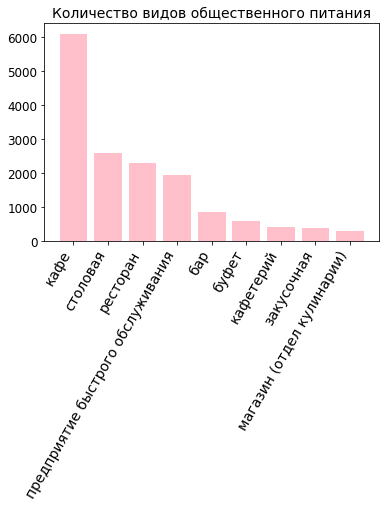

In [4]:
rest_object_type = rest.groupby('object_type')['id'].agg('count').reset_index().sort_values(by='id', ascending=False)
plt.bar(rest_object_type['object_type'], rest_object_type['id'], color='pink')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Количество видов общественного питания', fontsize=14)

Кафе является самой распространенной формой объекта общественного питания в Москве. Наверно, самый доступный вид заведения для среднего класса. Столовые проигрывают кафе в количестве почти в 2,5 раза. Но по количеству почти равны ресторанам. Интересное распределение. Пожалуй, самая дешевая еда и, пожалуй, самая дорогая еда в Москве представлены в одинаковых объемах.

##### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Text(0.5, 1.0, 'Сетевые и несетевые заведения')

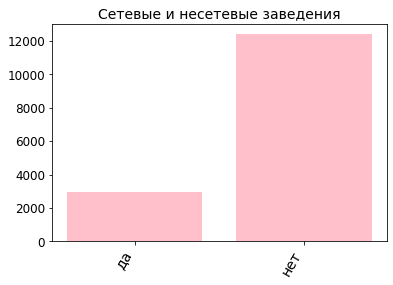

In [5]:
rest_chain = rest.groupby('chain')['id'].agg('count').reset_index()
plt.bar(rest_chain['chain'], rest_chain['id'], color='pink')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Сетевые и несетевые заведения', fontsize=14)


Text(0.5, 1.0, 'Доля сетевых и несетевых заведений')

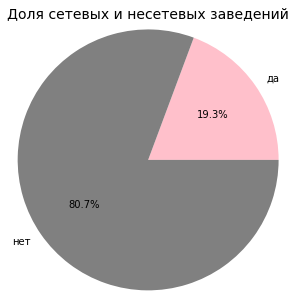

In [6]:
plt.figure(figsize=(12, 5))
plt.fontsize=50
plt.pie(rest_chain['id'], labels=rest_chain['chain'], autopct='%0.1f%%', colors=['pink','gray'], radius=1.2)
plt.title('Доля сетевых и несетевых заведений', fontsize=14)

Несетевых заведений в Москве гораздо больше. Возможно, это успех реформ и поблажек для малого бизнеса. С другой стороны, это странно, т.к. многие рестораторы отмечают, что заведение в Москве может выйти в прибыль, только если имеет сетевой тип присутствия на рынке.

##### Для какого вида объекта общественного питания характерно сетевое распространение?

In [7]:
rest_object_type_chain = rest.pivot_table(index=['object_type','chain'], values='id', aggfunc='count').reset_index()
rest_object_type_chain_new = rest.pivot_table(index='object_type', values='id', aggfunc='count')
rest_object_type_chain_total = rest_object_type_chain.merge(rest_object_type_chain_new, on='object_type')
rest_object_type_chain_total.columns = ['object_type','chain','count_chain', 'count_object_type']
rest_object_type_chain_total['%'] = ((rest_object_type_chain_total['count_chain'] / rest_object_type_chain_total['count_object_type'])
                                     .map(lambda x: '{:.2f}'.format(x)).astype('float64'))
rest_object_type_chain_total = (rest_object_type_chain_total.query('chain == "да"')
                                .drop(columns=['chain','count_chain','count_object_type'])
                                .sort_values('%'))
rest_object_type_chain_total

,object_type,%
16,столовая,0.00
2,буфет,0.02
0,бар,0.04
8,кафетерий,0.13
4,закусочная,0.16
6,кафе,0.23
14,ресторан,0.24
10,магазин (отдел кулинарии),0.29
12,предприятие быстрого обслуживания,0.41


Text(0.5, 1.0, 'Процент сетевого\nраспространения')

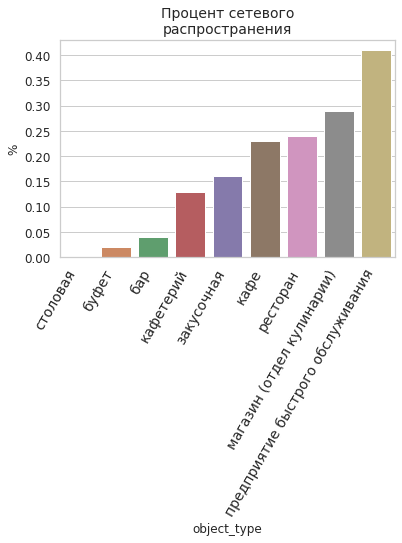

In [8]:
sns.set(style="whitegrid")
sns.barplot(x='object_type', y='%', data=rest_object_type_chain_total)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Процент сетевого\nраспространения', fontsize=14)

Наибольшее сетевое распространение наблюдается у предприятий быстрого питания. Скорее всего это связано с незамысловатой формулой приготовления и подачи еды. Проще унифицировать и доставлять в разные места обслуживания (заведения). Магазины относительно недавно начали выходить на новый формат с обустроенной кулинарией и местами посадки для принятия пищи. В связи с распространенностью магазинных сетей, отделы кулинарии идут на втором месте по распространенности. Столовые в наименьшей степени распространены как сеть. Скорее всего подразумеваются столовые при работодателях. 

Text(0.5, 1.0, 'Сетевое распространение для разных видов объектов общественного питания')

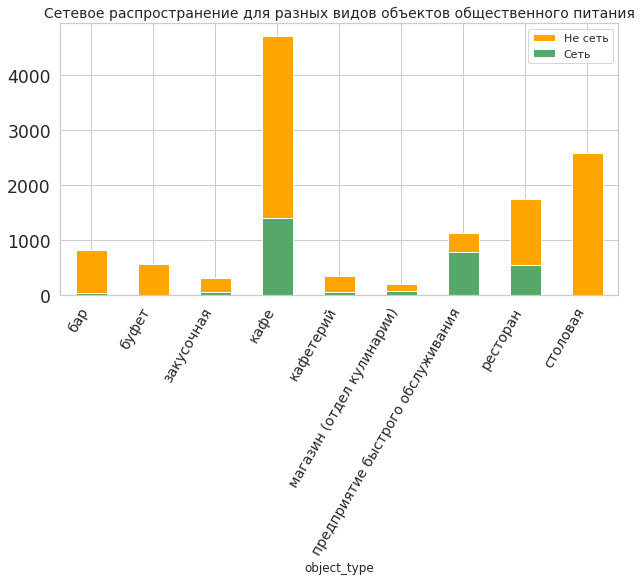

In [9]:
rest_object_type_chain_yes = rest_object_type_chain[rest_object_type_chain['chain'] == 'да']
rest_object_type_chain_no = rest_object_type_chain[rest_object_type_chain['chain'] == 'нет']
ax = rest_object_type_chain_no.plot(kind='bar', x='object_type', y='id', color='orange', label='Не сеть')
rest_object_type_chain_yes.plot(kind='bar', x='object_type', y='id', color='g', ax=ax, label='Сеть', fontsize='x-large', figsize=(10,5))
ticks = plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.title('Сетевое распространение для разных видов объектов общественного питания', fontsize=14)

Сетевое распространение характерно для предприятий быстрого обслуживания и для магазинов. В меньшей степени для ресторанов и кафе.

##### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [10]:
rest_chain_yes = rest[rest['chain'] == 'да']
rest_chain_yes_object_number = (rest_chain_yes
                                .groupby('Lem_object_name')['number']
                                .agg({'count','mean'})
                                .sort_values('count', ascending=False)
                                .reset_index())
rest_chain_yes_object_number['mean'] = rest_chain_yes_object_number['mean'].map(lambda x: '{:.0f}'.format(x)).astype('int64')
rest_chain_yes_many_object_bit_number = (rest_chain_yes_object_number[(rest_chain_yes_object_number['count'] > 10)&
                                                                      (rest_chain_yes_object_number['mean'] <= 53)])
rest_chain_yes_bit_object_many_number = (rest_chain_yes_object_number[(rest_chain_yes_object_number['count'] <= 10)&
                                                                      (rest_chain_yes_object_number['mean'] > 53)])
print('Количество сетевых заведений с широко развитой сетью и небольшим числом посадочных мест:', rest_chain_yes_many_object_bit_number['Lem_object_name'].count()) 
print('Количество сетевых заведений со слабо развитой сетью и большим числом посадочных мест:',  rest_chain_yes_bit_object_many_number['Lem_object_name'].count())

Количество сетевых заведений с широко развитой сетью и небольшим числом посадочных мест: 28
Количество сетевых заведений со слабо развитой сетью и большим числом посадочных мест: 115


Взяли среднее количество заведений в сети равным 10 заведениям, а количество посадочных мест в заведении - 53. Значения высчитывались с помощью метода .mean() у соответствующих столбцов. 

In [11]:
rest_chain_yes_max = rest_chain_yes.groupby('Lem_object_name')['number'].agg({'count','sum'}).reset_index().sort_values('count', ascending=False)
rest_chain_yes_max = rest_chain_yes_max.head(5)
rest_chain_yes_max

,Lem_object_name,count,sum
22,kfc,188,10497
298,шоколадница,183,10580
172,макдоналдс,173,15054
7,burger king,159,7655
264,теремок,111,3013


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

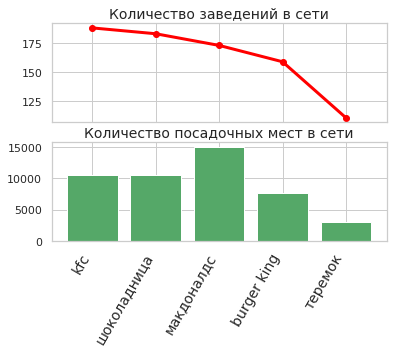

In [12]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(rest_chain_yes_max['Lem_object_name'],rest_chain_yes_max['count'], color='red', linewidth=3, marker='o')
axs[0].set_title('Количество заведений в сети', fontsize=14)
axs[1].bar(rest_chain_yes_max['Lem_object_name'], rest_chain_yes_max['sum'], color='g')
axs[1].set_title('Количество посадочных мест в сети', fontsize=14)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)

Макдональдс хоть и проигрывает по количеству заведений, но восполняет потери количеством посадочных мест. Хорошая стратегия, меньше затрат на логистику. Интересно, что Шоколадница обходит и Макдональдс, и Burger king по количеству заведений. Наверно, поэтому у них так сильно испортилось качество кухни.

##### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Text(0.5, 1.0, 'Среднее количество посадочных мест')

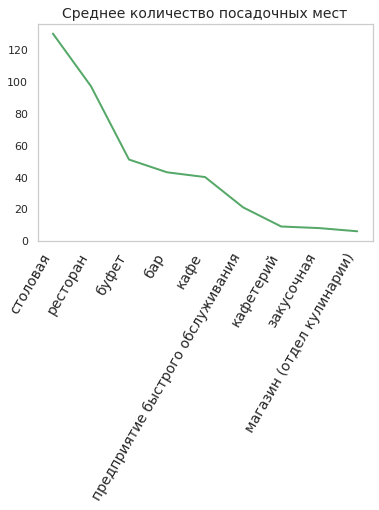

In [14]:
rest_object_type_number = (rest.groupby('object_type')['number'].mean()
                           .map(lambda x: '{:.0f}'.format(x))
                           .astype('int64').reset_index()
                           .sort_values('number', ascending=False))
plt.plot(rest_object_type_number['object_type'], rest_object_type_number['number'], color='g', linewidth=2)
ticks = plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)
plt.grid()
plt.title('Среднее количество посадочных мест', fontsize=14)

Столовые и рестораны идут нога в ногу не только по распространенности в городе, но и по количеству посадочных мест.

##### Выделите в отдельный столбец информацию об улице из столбца address .
##### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Text(0.5, 1.0, 'Топ-10 улиц по количеству объектов общественного питания')

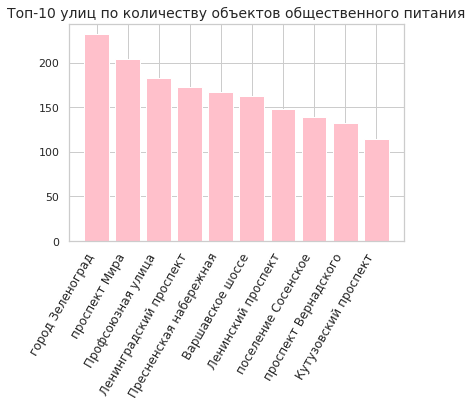

In [15]:
rest['streetname'] = (rest['address']
                  .str.replace('город Москва, ','')
                  .str.partition(',')[0])
rest_address = rest['streetname'].value_counts().reset_index()
rest_address.columns = ['streetname','count']
rest_address_top = rest_address.head(10)
plt.bar(rest_address_top['streetname'], rest_address_top['count'], color='pink')
tick = plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=14)

Оставляем города Зеленоград, Троицк, Щербинка и Московский, они будут идти как отдельные районы Москвы.

In [16]:
#data = pd.read_csv('mosgaz-streets.csv')
data = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
count_okrug = data.groupby(['streetname','okrug']).agg({'okrug':'count'})
count_okrug.columns = ['count_okrug']
count_okrug = count_okrug.reset_index()
count_okrug_max = count_okrug.groupby('streetname').agg({'count_okrug':'max'})
count_okrug_max = count_okrug_max.reset_index()
total_okrug = count_okrug.merge(count_okrug_max, on=['streetname','count_okrug'])
total_okrug = total_okrug.drop(columns='count_okrug')
total_top = rest_address_top.merge(total_okrug, on='streetname')
total_top

,streetname,count,okrug
0,город Зеленоград,232,Зеленоград
1,проспект Мира,204,СВАО
2,Профсоюзная улица,183,ЮЗАО
3,Ленинградский проспект,173,САО
4,Пресненская набережная,167,ЦАО
5,Варшавское шоссе,162,ЮАО
6,Ленинский проспект,148,ЮЗАО
7,проспект Вернадского,132,ЗАО
8,Кутузовский проспект,114,ЗАО


По количеству объектов общественного питания побеждает город Зеленоград. И то только потому, что он объединил в себя все улицы города. Все остальные улицы из топ-10 - главные хорды Москвы из центра в область за исключением маленькой Пресненской набережной, на которой разместился Сити. А так наибольшее количество объектов питания располагается на юге, юго-западе, западе и в центре Москвы.

##### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [17]:
rest_one_street = rest_address[rest_address['count'] == 1]
print('Количество улиц с одним объектом общественного питания: ', rest_one_street['count'].count(), 'шт.')
total_floor = rest_one_street.merge(total_okrug, on='streetname')
total_floor.groupby('okrug', as_index=False)['streetname'].count().sort_values('streetname',ascending=False)

Количество улиц с одним объектом общественного питания:  541 шт.


,okrug,streetname
6,ЦАО,172
4,СВАО,65
0,ВАО,64
8,ЮВАО,52
3,САО,50
1,ЗАО,43
7,ЮАО,28
5,СЗАО,27
9,ЮЗАО,27
2,Зеленоград,2


Что касается одного объекта питания на улице, то чаще всего такие улицы располагаются в центральном районе. В разы меньше, но следующие по позиции - северо-восток, восток и юго-восток.

##### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Text(0.5, 1.0, 'Распределение количества посадочных мест для улиц с объектами общественного питания')

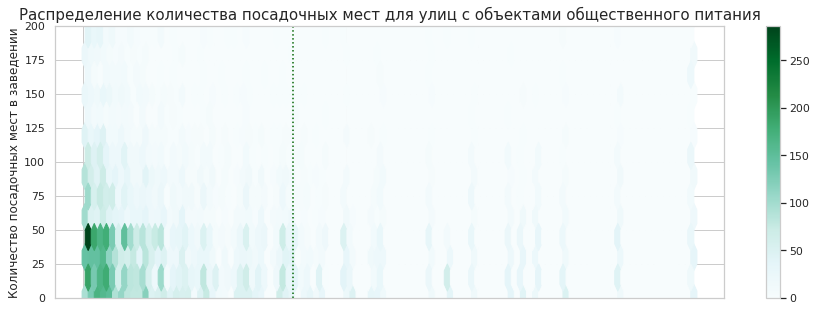

In [18]:
rest_new = rest.merge(rest_address, on='streetname')
rest_new.plot(kind='hexbin', x='count', y='number', ylim=(0,200), figsize=(15,5))
plt.axvline(x=80, color='darkgreen', linestyle=':')
plt.ylabel('Количество посадочных мест в заведении', fontsize=12)
plt.title('Распределение количества посадочных мест для улиц с объектами общественного питания', fontsize=15)

Самым популярным форматом все также остается заведение примерно на 50 мест. Можно увидеть, что с увеличением количества заведений на улице, эта тенденция сохраняется. Уменьшается скорее количество заведений с количеством мест больше 50. После 80 заведений на улице они просто размываются. Широкоформатные точки питания преобладают на улицах с наименьшим количеством точек питания. Возможно это связано с конкуренцией. Большой общепит имеет больше шансов играть с ценами и выигрывать на объеме.

In [19]:
#rest_new_many_obj['number'].describe()

In [20]:
rest_new['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

Третий процентиль количества объектов общественного питания на одной улице (75%) равен 80 шт. По графику и по таблицам распределения количества посадочных мест можем увидеть, что с увеличением количества заведений на улице, количество посадочных мест в нем падает.

Презентация: https://drive.google.com/open?id=10MFy4TLaTIcQtm1X_Dhuoq72UdXk_J4f